In [1]:
import pandas as pd
import numpy as np

In [2]:
ds= pd.read_excel('HSM data file kib.xlsx')

# recoding the roles 
role=['Business Owner', 
      'Business Owner & Community Leader', 
      'Business Owner & Community Leader & EM',
      'Business Owner & Workforce' ,
      'NRPO Ockracoke' ,
      'Workforce & Citizen']
new_code=['BW', 
          'BWC', 
          'BWCEM',
          'BWW',
          'NRPO',
          'WC']

ds['Role_acrn'] = ds['Role'].replace(role, new_code)

# recoding BF 
d_cd= [1]
n_cd= [2]
ds ['dc_2f']= ds['BF'].replace(d_cd, n_cd)

# addubg BB and BF
ds ['dc_b_f'] = ds['dc_2f'] + ds['BB']

# adding Def. and Imp. for Huristic
ds['Huristic']= ds['Defenese_pc'] + ds['Impression_pc']

ds.head()


,Interview_no,Role,Defense,Impression,Accuracy,Total,Defenese_pc,Impression_pc,Accuarcy_pc,BB,BF,risk_1NHg_2Hg,Role_acrn,dc_2f,dc_b_f,Huristic
0,H1,Business Owner,7,3,9,19,36.842105,15.789474,47.368421,0,1,2.0,BW,2,2,52.631579
1,H10,Business Owner & EM,5,0,7,12,41.666667,0.000000,58.333333,0,0,NaN,Business Owner & EM,0,0,41.666667
2,H11,Business Owner & Community Leader,7,2,7,16,43.750000,12.500000,43.750000,1,1,2.0,BWC,2,3,56.250000
3,H14,Business Owner & EM,0,12,22,34,0.000000,35.294118,64.705882,0,0,NaN,Business Owner & EM,0,0,35.294118
4,H15,Business Owner,15,17,2,34,44.117647,50.000000,5.882353,1,1,2.0,BW,2,3,94.117647


In [64]:
print(ds)

   Interview_no                                    Role  Defense  Impression  \
0            H1                          Business Owner        7           3   
1           H10                     Business Owner & EM        5           0   
2           H11       Business Owner & Community Leader        7           2   
3           H14                     Business Owner & EM        0          12   
4           H15                          Business Owner       15          17   
5           H17  Business Owner & Community Leader & EM       18          14   
6           H19                          Business Owner       13          15   
7            H2                          Business Owner        5           3   
8           H20                          Business Owner        1           1   
9            H6                          Business Owner       13           4   
10           H8       Business Owner & Community Leader        4           3   
11           O1                         

In [3]:

from sklearn.preprocessing import MinMaxScaler 

# selecting columns of data 
dtns= ds[['Defense','Impression','Accuracy','Total','Defenese_pc','Impression_pc','Accuarcy_pc','risk_1NHg_2Hg', 'dc_b_f', 'Huristic']]

# normalization of the columns 
scale= MinMaxScaler()

nrdt= pd.DataFrame(scale.fit_transform(dtns), columns= dtns.columns, index= dtns.index)

nrdt.head()


,Defense,Impression,Accuracy,Total,Defenese_pc,Impression_pc,Accuarcy_pc,risk_1NHg_2Hg,dc_b_f,Huristic
0,0.159091,0.085714,0.409091,0.171717,0.736842,0.180451,0.521053,1.0,0.666667,0.478947
1,0.113636,0.000000,0.318182,0.101010,0.833333,0.000000,0.641667,NaN,0.000000,0.358333
2,0.159091,0.057143,0.318182,0.141414,0.875000,0.142857,0.481250,1.0,1.000000,0.518750
3,0.000000,0.342857,1.000000,0.323232,0.000000,0.403361,0.711765,NaN,0.000000,0.288235
4,0.340909,0.485714,0.090909,0.323232,0.882353,0.571429,0.064706,1.0,1.000000,0.935294


In [6]:
# hyper parameter tuning
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor (random_state= 42)
from pprint import pprint 
print('Parameters in use: \n')
pprint(rf.get_params())


Parameters in use: 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [13]:
from sklearn.model_selection import RandomizedSearchCV

# No. of tree in random forest
n_estimators= [int(x) for x in np.linspace(start=200, stop= 2000, num=10)]

# number of features to consider at every split 
max_features= ['auto', 'sqrt']

# max no. of levels in tree 
max_depth= [int(x) for x  in np.linspace(10, 100, num= 11)]
max_depth.append(None)

# Min nu. os sample required to split a node
min_samples_split= [2, 5, 10]

# Min no. of samples required at each leaf node
min_samples_leaf= [1, 2, 4]

#method of selecting samples for taining each tree
bootstrap= [True, False] 

# create the random grid
random_grid= {'n_estimators': n_estimators,
             'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

pprint(random_grid)
              

{'bootstrap': [True, False],
 'max_depth': [10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [16]:
from sklearn.model_selection import train_test_split
x= np.array (ds[['Defenese_pc','Impression_pc','Accuarcy_pc']])
y= np.array(ds[[ 'dc_b_f']])

In [17]:
y


array([[2],
       [0],
       [3],
       [0],
       [3],
       [2],
       [2],
       [3],
       [0],
       [2],
       [3],
       [1],
       [0],
       [0],
       [0],
       [2],
       [3],
       [3],
       [1],
       [1],
       [1],
       [3],
       [3],
       [1],
       [1],
       [3],
       [3],
       [2],
       [1]])

In [18]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=.3, random_state= 42)

In [19]:
# Use the random grid to search for the best hyperparameters 
# First create the base model to tune
rf= RandomForestRegressor()
# random search of parameters, using  3 fold cross validation, 
# search across 100 different combinations, and use all available cores 

rf_random= RandomizedSearchCV(estimator= rf, param_distributions= random_grid, 
                              n_iter= 100, cv= 3, verbose=2, 
                              random_state= 42, n_jobs= -1)
# fit the random search model 
rf_random.fit(xtrain, ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/akibria/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/akibria/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/akibria/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/akibria/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686:

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [20]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [22]:
# evaluate random search 
def evaluate(model, xtest, ytest):
    predictions = model.predict(xtest)
    errors = abs(predictions - ytest)
    mape = 100 * np.mean(errors / ytest)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(xtrain, ytrain)
base_accuracy = evaluate(base_model, xtest, ytest)

Model Performance
Average Error: 1.0012 degrees.
Accuracy = -inf%.


/var/folders/h7/sn4kkl7179lf25fhm8fdhnb80000gn/T/ipykernel_1522/3324297347.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  base_model.fit(xtrain, ytrain)
/var/folders/h7/sn4kkl7179lf25fhm8fdhnb80000gn/T/ipykernel_1522/3324297347.py:5: RuntimeWarning: divide by zero encountered in divide
  mape = 100 * np.mean(errors / ytest)


[CV] END bootstrap=True, max_depth=28, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   0.8s
[CV] END bootstrap=False, max_depth=46, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.4s
[CV] END bootstrap=False, max_depth=82, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   0.8s
[CV] END bootstrap=True, max_depth=19, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.6s
[CV] END bootstrap=True, max_depth=73,

In [14]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(xtrain, ytrain)

NameError: name 'xtrain' is not defined

In [ ]:
print('Adaptation Action Class: ')
a= float(input('Defense (%): '))
b= float(input('Impression (%): '))
c= float(input('Accuracy (%): '))
         
features= np.array([[a,b,c]])
class_mod= model.predict(features)
print('Action Class: ', class_mod)

Adaptation Action Class: 


In [71]:
forest= RandomForestClassifier()
y_pred= model.predict(xtest)

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# accuracy score 
accuracy_score(ytest, y_pred)



0.4444444444444444

In [73]:
# confusion matrix

confusion_matrix(ytest, y_pred)

array([[1, 0, 1],
       [0, 0, 3],
       [0, 1, 3]])

<function matplotlib.pyplot.show(close=None, block=None)>

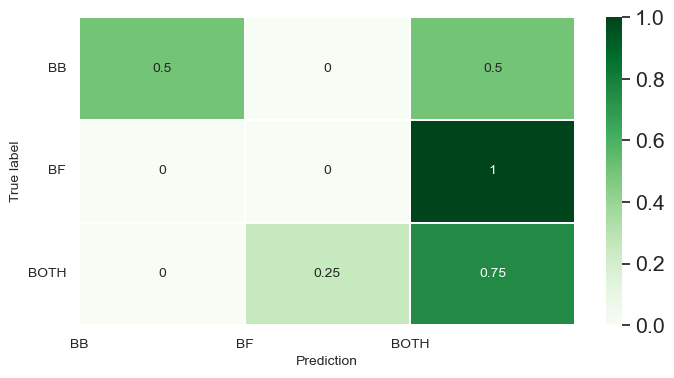

In [109]:
# reshap confusion matrix

mtx= confusion_matrix(ytest, y_pred)
mtx= mtx.astype('float') / mtx.sum(axis=1)[:, np.newaxis]

#plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize= (8,4))
sns.set(font_scale=1.4)
sns.heatmap(mtx, annot=True, annot_kws={'size': 10},
            cmap= plt.cm.Greens, linewidths= 0.2)

# labels addition
class_names= ['BB', 'BF', 'BOTH']
tick_mark= np.arange(len(class_names))
tick_mark1= tick_mark + .5
sns.set(font_scale=2)
plt.xticks(tick_mark, class_names, rotation= 0, fontsize=10)
plt.yticks(tick_mark1, class_names, rotation= 0, fontsize=10)
plt.xlabel('Prediction', fontsize=10)
plt.ylabel('True label' ,fontsize=10)
plt.show




In [76]:
# classification report

print(classification_report(ytest, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           2       0.00      0.00      0.00         3
           3       0.43      0.75      0.55         4

    accuracy                           0.44         9
   macro avg       0.48      0.42      0.40         9
weighted avg       0.41      0.44      0.39         9

